# Laboratory 5 - Systems of linear equation
#### Grzegorz Fotyga

## 1 Introduction

The aim of the following laboratory is to use various algorithms to solve systems of linear equations. The analyzed systems of equations are related to the PageRank algorithm, which was discussed in previous classes. In this laboratory, it is crucial to observe the effectiveness of individual algorithms.


### Task 1

The following code is used to generate the matrix: Edges. It contains links in a network of sites. Based on the connections, we generate matrices related to the PageRank algorithm. Solving the system of linear equations will allow you to determine the ranking of the pages (just like in the previous classes). Note - the codes below are only for generating Edges arrays. Understanding them is not necessary to complete subsequent tasks.

Generate network with 2000 sites and dnsity of connection: 20. 

In [1]:
import numpy as np

def remove_duplicate_columns(matrix):
    unique_columns = np.unique(matrix, axis=1)
    return unique_columns

def generate_network(N, density):
    Edges = np.random.randint(1, N+1, size=(2, int(N * density)))
    Edges = np.delete(Edges, np.where(Edges[0] == Edges[1]), axis=1)
    Edges = remove_duplicate_columns(Edges)
    return Edges


n = 2000  # number of sites
density = 20  # density of connections in the network
Edges = generate_network(n, density)
print("number of connections in the network:", Edges.shape[1])  # print number of connections

number of connections in the network: 39799


### Task 2

Generate matrices related to the PageRank algorithm based on the network. Create an appropriate function that generates PageRank matrices and can be used in subsequent tasks.

In [2]:
from scipy.sparse import csr_matrix
from scipy.sparse import identity
import matplotlib.pyplot as plt 

d = 0.1  # dumping factor
b = np.ones(n) * (1-d)/n
I = identity(n, format='csr')

B = csr_matrix((n,n))
B[Edges[1] - 1, Edges[0] - 1] = 1

L = np.zeros(n)
for i in range(n):
    L[i] = np.sum(B[:,i])

A = csr_matrix((n,n))
for i in range(n):
    A[i,i] = 1/L[i]
M = I - d * B @ A

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


### Task 3

- Solve Page Rank system of equations $\mathbf{M}\mathbf{r} = \mathbf{b}$ using *inv()* funcion from *scipy* module: $\mathbf{r} = \mathbf{M}^{-1}\mathbf{b}$. Save $\mathbf{r}$ for comparison with other methods.

- Measure the time needed for this operation (and save it for comparison with other methods).

- (and promise that this lab will be the last time you solve a system of equations this way!)

- Use function *plt.spy()* with parameter: *markersize=0.1* to observe nonzero elements of $\mathbf{M}$ and $\mathbf{M}^{-1}$ matrices. Check the memory usage of both matrices. Comment these results. 

In [3]:
from scipy.sparse.linalg import inv

reversed_M = inv(M)
r1 = reversed_M @ b

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\sparse\linalg\_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


In [4]:
import sys 
memory_usage = M.data.nbytes + M.indices.nbytes + M.indptr.nbytes
print("Memory usage of CSR matrix:", memory_usage, "bytes")
memory_usage = reversed_M.data.nbytes + reversed_M.indices.nbytes + reversed_M.indptr.nbytes
print("Memory usage of CSR matrix:", memory_usage, "bytes")

Memory usage of CSR matrix: 509592 bytes
Memory usage of CSR matrix: 48008004 bytes


Your commens: time for r 10s 563ms, nonzero elements of M and M^-1 are the same, but M is sparse matrix and M^-1 is dense matrix. Memory usage of M is 0.33432 MB, while M^-1 is 48.008004 MB.

### Task 4

- Solve the same system of equations using direct method: *spsolve()*. Save $\mathbf{r}$ for comparison with other methods.
- Measure the time needed for this operation (and save it for comparison with other methods).
- Use plt.plot() function to show the difference between solutions obtained in previous tasks. What is the maximum value of the difference between these vectors?
- Compute the norm (*np.linalg.norm()*) of the the difference between these two vectors. 

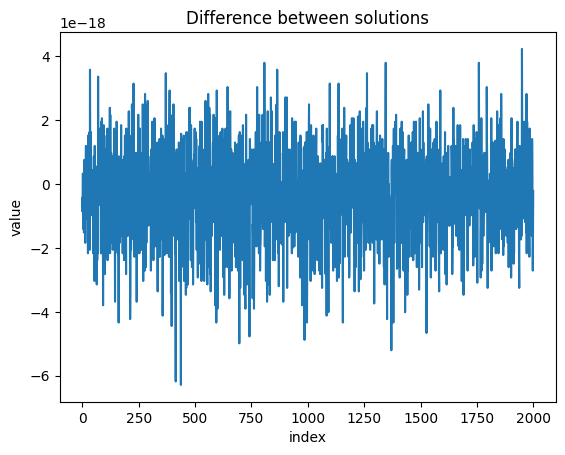

Maximum value of the difference: 4.228388472693467e-18
Norm of the difference: 6.504646062819325e-17


In [5]:
from scipy.sparse.linalg import spsolve

r2 = spsolve(M, b)
# time: 856ms
difference = r1 - r2
plt.plot(difference)
plt.title("Difference between solutions")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

print("Maximum value of the difference:", np.max(difference))

norm = np.linalg.norm(difference)
print("Norm of the difference:", norm)

### Task 5

In this task you will implement Jacobi mathod. Firstly, split $\mathbf{M}$ into 3 components: *$\textbf{M} = -\textbf{L} - \textbf{U} + \textbf{D}$*

- $\textbf{L}$ contains all elements of $\mathbf{M}$, which lie below the diagonal (without diagonal). It can be computed using *tril()*, with parameter *k = -1*, wchich means that we do not include elements from diagonal. 

- $\textbf{U}$ contains all elements of $\mathbf{M}$, which lie above the diagonal (without diagonal). It can be computed using *triu()*, with parameter *k = 1*, wchich means that we do not include elements from diagonal. 

- $\textbf{D}$ contains all elements of $\mathbf{M}$, which lie at the diagonal. In our case it is just identity matrix. 

- Use *spy()* to observe nonzero elements. 


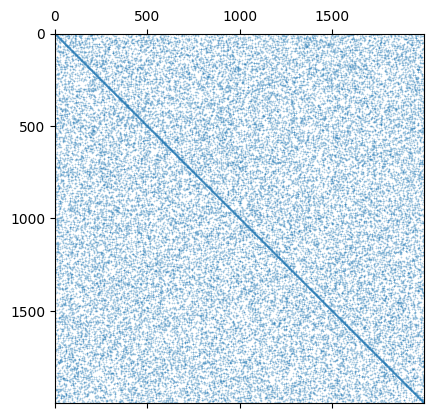

In [6]:
from scipy.sparse import csr_matrix, triu, tril

def getParts(M):
    L = -tril(M, k=-1)
    U = -triu(M, k=1)
    D = identity(n, format='csr')
    return L, U, D

L, U, D = getParts(M)
plt.spy(L, markersize=0.1)
plt.spy(U, markersize=0.1)
plt.spy(D, markersize=0.1)

### Task 6 - Jacobi

- Generate $\mathbf{r}^0$ vector of the same size as $\mathbf{b}$ vector, which is full of ones. It will be used as a starting vector for Jacobi scheme. 
- Use Jacobi scheme to solve system of equations in iterative way: $\widetilde{\textbf{r}}^{n+1} = \textbf{D}^{-1}(\textbf{L} + \textbf{U})\widetilde{\textbf{r}}^{n} + \textbf{D}^{-1}\textbf{b}$	

- Hint: $\mathbf{D}$ is an identity matrix. Do you need to explicitely compute $\mathbf{D}^{-1}$? 
- In each iteration compute the real error ($\textbf{e}^n = \textbf{r} - \widetilde{\textbf{r}}^{n} $, where $\textbf{r}$ is a solution obtained using the direct scheme (task 4)) and the residual error ($\textbf{res}^n = \textbf{M}\widetilde{\textbf{r}}^n - \textbf{b}$)
- Observe the NORM of these error vectors in subsequent iterations. 
- Stop iterative scheme once the NORM of the residual error falls below the value 1e-12.

In [ ]:
def jacobi(M, b, tol=1e-12):
    rn = np.ones(n)
    L, U, D = getParts(M)
    norm = np.inf
    iteration = 0
    while norm > tol:
        LplusU = L + U
        rn_next = spsolve(D, LplusU @ rn + b)

        rn = rn_next
        e = r1 - rn
        res = M @ rn - b
        norm = np.linalg.norm(e - res)
        iteration += 1
        print("Iteration:", iteration, "Norm of error:", norm)
    return rn_next

r3 = jacobi(M, b)

Iteration: 1 Norm of error: 8.720203354745
Iteration: 2 Norm of error: 0.8729717975512582
Iteration: 3 Norm of error: 0.0872972226559077
Iteration: 4 Norm of error: 0.008730053973733264
Iteration: 5 Norm of error: 0.0008730043152470411
Iteration: 6 Norm of error: 8.730041368459698e-05
Iteration: 7 Norm of error: 8.730038327780593e-06
Iteration: 8 Norm of error: 8.730037601761487e-07
Iteration: 9 Norm of error: 8.730037499610842e-08
Iteration: 10 Norm of error: 8.73003750195018e-09
Iteration: 11 Norm of error: 8.730037632888103e-10
Iteration: 12 Norm of error: 8.73003908246479e-11
Iteration: 13 Norm of error: 8.730053243909432e-12
Iteration: 14 Norm of error: 8.730196414496575e-13


### Task 7

Compare the computational times of three methods: inv, direct and Jacobi.

inv - 10s 563ms
direct - 856ms
Jacobi - 25ms

the Jacobi method is the fastest one.

### Task 8 - additional

implement Gauss - Seidel scheme.
 
$\widetilde{\textbf{r}}^{n+1} = (\textbf{D -L})^{-1}(\textbf{U} \widetilde{\textbf{r}}^{n}) + (\textbf{D -L})^{-1}\textbf{b}$

In [8]:
def GaussSeidelScheme(M, b, tol=1e-12):
    rn = np.ones(n)
    L, U, D = getParts(M)
    norm = np.inf
    iteration = 0
    while norm > tol:
        DminusL = D - L
        rn_next = spsolve(DminusL, U @ rn + b)

        rn = rn_next
        e = r1 - rn
        res = M @ rn - b
        norm = np.linalg.norm(e - res)
        iteration += 1
        print("Iteration:", iteration, "Norm of error:", norm)
    return rn_next
r4 = GaussSeidelScheme(M, b)

Iteration: 1 Norm of error: 5.4532324234121745
Iteration: 2 Norm of error: 0.23817946795252895
Iteration: 3 Norm of error: 0.008104446413390068
Iteration: 4 Norm of error: 0.00023795410234394389
Iteration: 5 Norm of error: 6.525109219619862e-06
Iteration: 6 Norm of error: 1.7583621131911038e-07
Iteration: 7 Norm of error: 4.751206577398033e-09
Iteration: 8 Norm of error: 1.2898716597939694e-10
Iteration: 9 Norm of error: 3.5079220423017663e-12
Iteration: 10 Norm of error: 9.540771087264948e-14
